In [1]:
!pip install bayesian-optimization

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.tree import export_graphviz
from bayes_opt import BayesianOptimization

%matplotlib inline
sns.set()

In [3]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [4]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [5]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [6]:
y = df['Satisfaction_Score']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#from IPython.display import Audio
#sound_file = 'http://www.soundjay.com/button/beep-07.wav'
#Audio(sound_file, autoplay=True)

In [9]:
begin_time = datetime.datetime.now()
from sklearn import metrics
def lasso_fit(n_estimators, max_depth, min_samples_split):
    lasso = Lasso(
        alpha = float(alpha), 
        random_state=42, 
        verbose=1)
    train_lasso = lasso.fit(x_train,y_train)
    y_pred = train_lasso.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    return rmse

In [10]:
lassoBO = BayesianOptimization(lasso_fit, {
    'alpha': (0.1,1.0)}
lassoBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 221 out of 221 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 221 out of 221 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


|  1        |  4.022    |  54.44    |  49.89    |  221.2    |


[Parallel(n_jobs=1)]: Done 218 out of 218 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 218 out of 218 | elapsed:    0.0s finished


|  2        |  4.081    |  21.08    |  64.57    |  218.5    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:    0.4s finished


|  3        |  3.845    |  21.93    |  3.621    |  990.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 525 out of 525 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 525 out of 525 | elapsed:    0.0s finished


|  4        |  4.094    |  73.27    |  60.93    |  525.2    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed:    0.0s finished


|  5        |  4.197    |  30.84    |  75.21    |  438.2    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 523 out of 523 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 523 out of 523 | elapsed:    0.0s finished


|  6        |  4.135    |  71.43    |  56.14    |  523.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    0.0s finished


|  7        |  4.183    |  35.09    |  74.85    |  458.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


|  8        |  4.035    |  53.58    |  34.13    |  500.9    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 446 out of 446 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 446 out of 446 | elapsed:    0.0s finished


|  9        |  4.172    |  35.02    |  96.77    |  446.5    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 449 out of 449 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 449 out of 449 | elapsed:    0.0s finished


|  10       |  4.214    |  8.284    |  80.72    |  449.6    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 428 out of 428 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 428 out of 428 | elapsed:    0.0s finished


|  11       |  4.152    |  7.654    |  51.73    |  428.4    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    0.0s finished


|  12       |  4.091    |  104.8    |  66.74    |  440.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished


|  13       |  4.188    |  12.86    |  97.6     |  417.2    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 303 out of 303 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 303 out of 303 | elapsed:    0.0s finished


|  14       |  4.169    |  77.44    |  77.74    |  303.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 843 out of 843 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 843 out of 843 | elapsed:    0.1s finished


|  15       |  4.183    |  19.54    |  78.3     |  843.5    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 577 out of 577 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 577 out of 577 | elapsed:    0.2s finished


|  16       |  3.951    |  52.63    |  10.1     |  577.5    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    0.0s finished


|  17       |  4.041    |  63.32    |  50.85    |  380.4    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 471 out of 471 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 471 out of 471 | elapsed:    0.0s finished


|  18       |  4.359    |  5.0      |  102.0    |  471.6    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 491 out of 491 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 491 out of 491 | elapsed:    0.0s finished


|  19       |  4.261    |  7.773    |  98.25    |  491.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 476 out of 476 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 476 out of 476 | elapsed:    0.0s finished


|  20       |  4.173    |  9.04     |  82.09    |  476.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 468 out of 468 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 468 out of 468 | elapsed:    0.0s finished


|  21       |  4.188    |  16.66    |  99.54    |  468.2    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    0.1s finished


|  22       |  4.116    |  55.63    |  70.21    |  567.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:    0.1s finished


|  23       |  4.192    |  10.76    |  100.6    |  509.6    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 528 out of 528 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 528 out of 528 | elapsed:    0.0s finished


|  24       |  4.154    |  97.24    |  80.05    |  528.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    0.0s finished


|  25       |  4.366    |  5.843    |  97.87    |  458.4    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    0.0s finished


|  26       |  4.148    |  9.088    |  79.91    |  479.4    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 827 out of 827 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 827 out of 827 | elapsed:    0.1s finished


|  27       |  4.109    |  40.4     |  49.95    |  827.9    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 436 out of 436 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 436 out of 436 | elapsed:    0.0s finished


|  28       |  4.286    |  6.826    |  96.1     |  436.6    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 878 out of 878 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 878 out of 878 | elapsed:    0.2s finished


|  29       |  4.194    |  18.62    |  97.79    |  878.1    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 880 out of 880 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 880 out of 880 | elapsed:    0.1s finished


|  30       |  4.351    |  5.0      |  62.34    |  881.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.2s finished


|  31       |  4.158    |  7.816    |  59.0     |  900.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 866 out of 866 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 866 out of 866 | elapsed:    0.1s finished


|  32       |  4.124    |  7.456    |  46.01    |  866.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:    0.1s finished


|  33       |  4.335    |  5.0      |  75.2     |  875.3    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 878 out of 878 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 878 out of 878 | elapsed:    0.1s finished


|  34       |  4.121    |  20.13    |  68.77    |  878.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 887 out of 887 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 887 out of 887 | elapsed:    0.2s finished


|  35       |  4.203    |  7.782    |  75.78    |  887.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 861 out of 861 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 861 out of 861 | elapsed:    0.1s finished


|  36       |  4.175    |  11.83    |  86.97    |  861.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 867 out of 867 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 867 out of 867 | elapsed:    0.1s finished


|  37       |  4.142    |  9.307    |  66.61    |  867.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    0.0s finished


|  38       |  4.271    |  7.565    |  100.8    |  451.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 886 out of 886 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 886 out of 886 | elapsed:    0.1s finished


|  39       |  4.352    |  5.37     |  49.84    |  886.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 889 out of 889 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 889 out of 889 | elapsed:    0.1s finished


|  40       |  4.357    |  5.041    |  38.19    |  889.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 889 out of 889 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 889 out of 889 | elapsed:    0.1s finished


|  41       |  4.017    |  18.53    |  32.37    |  889.5    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 466 out of 466 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 466 out of 466 | elapsed:    0.0s finished


|  42       |  4.227    |  7.195    |  88.84    |  466.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    0.0s finished


|  43       |  4.176    |  9.788    |  79.7     |  425.1    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 901 out of 901 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 901 out of 901 | elapsed:    0.1s finished


|  44       |  4.267    |  6.028    |  39.42    |  901.8    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 891 out of 891 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 891 out of 891 | elapsed:    0.1s finished


|  45       |  4.346    |  5.286    |  46.74    |  891.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 813 out of 813 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 813 out of 813 | elapsed:    0.2s finished


|  46       |  4.207    |  20.71    |  101.1    |  813.7    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 788 out of 788 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 788 out of 788 | elapsed:    0.1s finished


|  47       |  4.177    |  25.2     |  90.6     |  788.0    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 825 out of 825 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 825 out of 825 | elapsed:    0.1s finished


|  48       |  4.165    |  40.81    |  96.18    |  825.6    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 883 out of 883 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 883 out of 883 | elapsed:    0.1s finished


|  49       |  4.357    |  5.741    |  40.92    |  883.6    |


In [11]:
lassoBO.max
#Audio(sound_file, autoplay=True)

{'target': 4.365925180530736,
 'params': {'max_depth': 5.842624871845779,
  'min_samples_split': 97.86704459986727,
  'n_estimators': 458.3866772082009}}

In [12]:
test_params = lassoBO.max['params']

In [14]:
test_rf = RandomForestClassifier(random_state=42, 
                                verbose=1, 
                                **test_params)
test_rf.fit(x_train,y_train)
y_pred = test_rf.predict(x_test)
wall_clock = datetime.datetime.now() - begin_time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    0.0s finished


In [15]:
print(x_test.shape, np.shape(y_pred))

(522, 247) (522,)


In [16]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 4.282415260080474 
 MAE: 3.0555555555555554


In [17]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


30


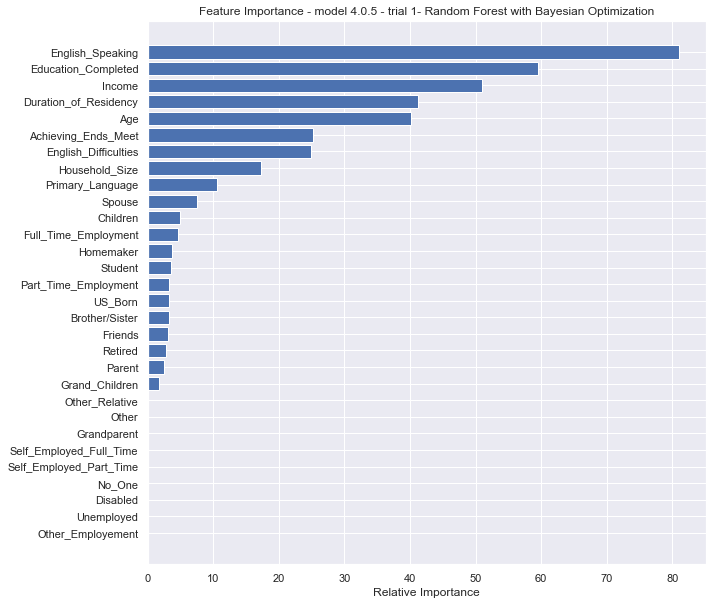

In [20]:
feature_importance = test_rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature')
plt.title('Feature Importance - model 4.0.5 - trial 1- Random Forest with Bayesian Optimization')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.0.5 - trial 1- Random Forest with Bayesian Optimization.png')

In [21]:
import csv
model_name = 'Model 4.0.5 - Random Forest with Bayesian Optimization'
values = [model_name,
          test_rf,
          np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
          metrics.mean_absolute_error(y_test, y_pred), 
          wall_clock]
out = csv.writer(open("Model 4.0.5 Performance Metrics - trial 1.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(values)

245